# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define two 3x3 complex matrices
m1 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,1,0,0,0,1],
               [0,0,0,1,0,0],
               [0,0,1,0,0,0],
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])


print("Input: ", m1,v1)

# Multiplying a 3x3 matrix by a 3x1 vector
state_after_one_click = np.dot(m1, v1)
print("Result after one Click: ", state_after_one_click)

Input:  [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]] [[ 6]
 [ 2]
 [ 1]
 [ 5]
 [ 3]
 [10]]
Result after one Click:  [[ 0]
 [ 0]
 [12]
 [ 5]
 [ 1]
 [ 9]]


![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [2]:
print("Result after two clicks: ", np.dot(m1,state_after_one_click))

Result after two clicks:  [[ 0]
 [ 0]
 [ 9]
 [ 5]
 [12]
 [ 1]]


## Exercises



### Excercise 1:

1. Write a program to model the behavior of the probabilistic double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)


2. EJERCICIO 1: SISTEMA PROBABILÍSTICO
----------------------------------------
Simulación del sistema probabilístico de doble rendija:
Detector	Probabilidad
D0		0.0050
D1		0.0300
D2		0.1250
D3		0.3400
D4		0.3400
D5		0.1250
D6		0.0300
D7		0.0050


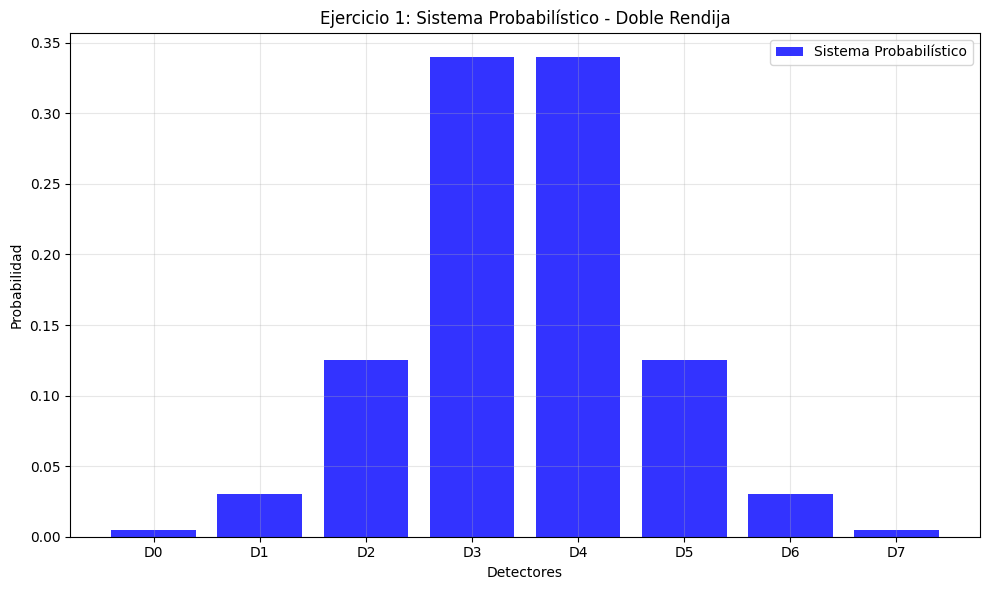

In [3]:
print("\n2. EJERCICIO 1: SISTEMA PROBABILÍSTICO")
print("-" * 40)

def probabilistic_double_slit():
    """
    Modela el experimento de doble rendija desde una perspectiva probabilística.
    En este sistema, las probabilidades se suman directamente (no hay interferencia).
    """

    # Matriz de probabilidades del sistema probabilístico de doble rendija
    # Filas: detectores finales (0-7)
    # Columnas: [fuente, rendija1, rendija2, detector0, detector1, detector2, detector3, detector4, detector5, detector6, detector7]

    # Estado inicial: partícula en la fuente
    initial_state = np.array([1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

    # Matriz de transición probabilística
    # Desde la fuente a las rendijas (50% cada una)
    # Desde cada rendija a los detectores con distribución gaussiana
    M_prob = np.array([
        # Fuente -> Rendijas
        [0,   0.5, 0.5, 0,    0,    0,    0,    0,    0,    0,    0   ],  # a rendija 1
        [0,   0,   0,   0,    0,    0,    0,    0,    0,    0,    0   ],  # a rendija 2

        # Rendijas -> Detectores
        [0,   0,   0,   0.01, 0.05, 0.20, 0.48, 0.20, 0.05, 0.01, 0   ],  # rendija 1 -> detectores
        [0,   0,   0,   0,    0.01, 0.05, 0.20, 0.48, 0.20, 0.05, 0.01],  # rendija 2 -> detectores

        # Detectores (absorben)
        [0,   0,   0,   1,    0,    0,    0,    0,    0,    0,    0   ],  # detector 0
        [0,   0,   0,   0,    1,    0,    0,    0,    0,    0,    0   ],  # detector 1
        [0,   0,   0,   0,    0,    1,    0,    0,    0,    0,    0   ],  # detector 2
        [0,   0,   0,   0,    0,    0,    1,    0,    0,    0,    0   ],  # detector 3
        [0,   0,   0,   0,    0,    0,    0,    1,    0,    0,    0   ],  # detector 4
        [0,   0,   0,   0,    0,    0,    0,    0,    1,    0,    0   ],  # detector 5
        [0,   0,   0,   0,    0,    0,    0,    0,    0,    1,    0   ],  # detector 6
        [0,   0,   0,   0,    0,    0,    0,    0,    0,    0,    1   ]   # detector 7
    ])

    # Versión simplificada: probabilidades directas desde rendijas a detectores
    # Probabilidad de ir de la fuente a cada rendija
    prob_to_slit1 = 0.5
    prob_to_slit2 = 0.5

    # Probabilidades desde cada rendija a cada detector
    # Distribución gaussiana centrada en diferentes posiciones
    detectors = np.array([0, 1, 2, 3, 4, 5, 6, 7])

    # Probabilidades desde rendija 1 (centrada en detector 2.5)
    prob_slit1_to_detectors = np.array([0.01, 0.05, 0.20, 0.48, 0.20, 0.05, 0.01, 0.00])

    # Probabilidades desde rendija 2 (centrada en detector 4.5)
    prob_slit2_to_detectors = np.array([0.00, 0.01, 0.05, 0.20, 0.48, 0.20, 0.05, 0.01])

    # Probabilidad total en cada detector (suma de probabilidades)
    total_probabilities = (prob_to_slit1 * prob_slit1_to_detectors +
                          prob_to_slit2 * prob_slit2_to_detectors)

    return detectors, total_probabilities

# Ejecutar simulación probabilística
detectors, prob_intensities = probabilistic_double_slit()

print("Simulación del sistema probabilístico de doble rendija:")
print("Detector\tProbabilidad")
for i, prob in enumerate(prob_intensities):
    print(f"D{i}\t\t{prob:.4f}")

# Gráfico del sistema probabilístico
plt.figure(figsize=(10, 6))
plt.bar(detectors, prob_intensities, alpha=0.8, color='blue', label='Sistema Probabilístico')
plt.xlabel('Detectores')
plt.ylabel('Probabilidad')
plt.title('Ejercicio 1: Sistema Probabilístico - Doble Rendija')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(detectors, [f'D{i}' for i in detectors])
plt.tight_layout()
plt.show()

### Excercise 2:

1. Write a program to model the behavior of the quantum double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/QuantumSystem.png)


3. EJERCICIO 2: SISTEMA CUÁNTICO
----------------------------------------
Simulación del sistema cuántico de doble rendija:
Detector	Amplitud		Intensidad |ψ|²
D0		0.035+0.000j		0.0013
D1		0.106+0.050j		0.0136
D2		0.318+0.156j		0.1254
D3		0.713+0.225j		0.5589
D4		0.806+0.000j		0.6498
D5		0.381-0.225j		0.1955
D6		0.071-0.156j		0.0292
D7		-0.015-0.050j		0.0027


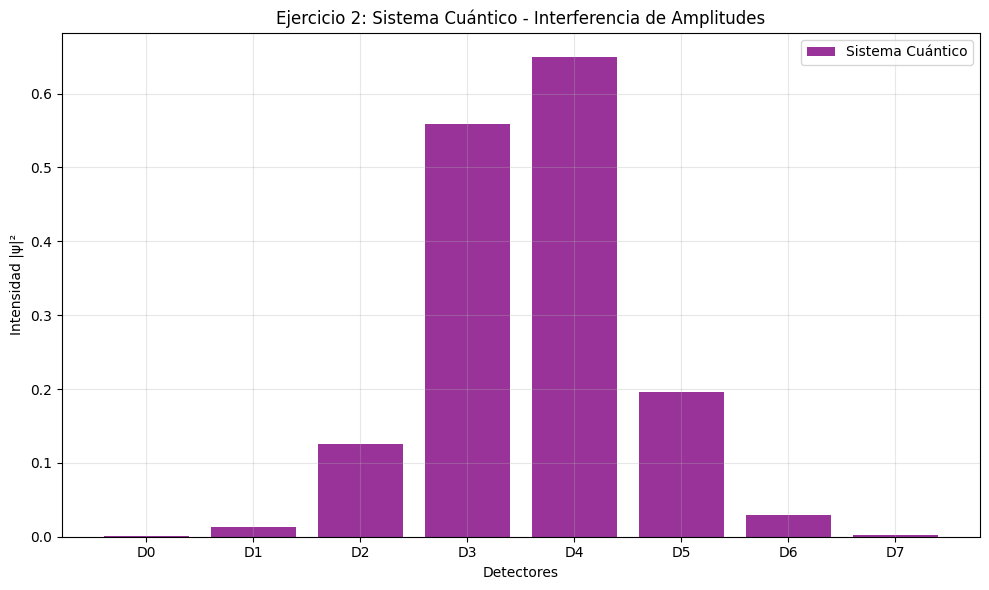

In [4]:
print("\n3. EJERCICIO 2: SISTEMA CUÁNTICO")
print("-" * 40)

def quantum_double_slit():
    """
    Modela el comportamiento cuántico donde las amplitudes complejas interfieren.
    Las amplitudes se suman primero, luego se calcula la intensidad como |amplitud|².
    """

    # Amplitudes complejas desde la fuente a cada rendija
    amp_to_slit1 = 1/np.sqrt(2) + 0j  # Normalizado
    amp_to_slit2 = 1/np.sqrt(2) + 0j

    # Amplitudes desde cada rendija a cada detector
    # Incluyendo fases que dependen de la diferencia de camino óptico
    detectors = np.array([0, 1, 2, 3, 4, 5, 6, 7])

    # Amplitudes base (magnitudes)
    base_amp1 = np.array([0.1, 0.22, 0.45, 0.69, 0.45, 0.22, 0.1, 0.05])
    base_amp2 = np.array([0.05, 0.1, 0.22, 0.45, 0.69, 0.45, 0.22, 0.1])

    # Fases debido a diferencias de camino (simuladas)
    phases1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])  # Sin fase adicional para rendija 1
    phases2 = np.array([np.pi, 3*np.pi/4, np.pi/2, np.pi/4, 0, -np.pi/4, -np.pi/2, -3*np.pi/4])  # Fases para rendija 2

    # Amplitudes complejas desde cada rendija
    amp_slit1_to_detectors = base_amp1 * np.exp(1j * phases1)
    amp_slit2_to_detectors = base_amp2 * np.exp(1j * phases2)

    # Amplitud total en cada detector (suma coherente)
    total_amplitudes = (amp_to_slit1 * amp_slit1_to_detectors +
                       amp_to_slit2 * amp_slit2_to_detectors)

    # Intensidad = |amplitud|²
    intensities = np.abs(total_amplitudes)**2

    return detectors, intensities, total_amplitudes

# Ejecutar simulación cuántica
detectors, quantum_intensities, amplitudes = quantum_double_slit()

print("Simulación del sistema cuántico de doble rendija:")
print("Detector\tAmplitud\t\tIntensidad |ψ|²")
for i, (amp, intensity) in enumerate(zip(amplitudes, quantum_intensities)):
    print(f"D{i}\t\t{amp:.3f}\t\t{intensity:.4f}")

# Gráfico del sistema cuántico
plt.figure(figsize=(10, 6))
plt.bar(detectors, quantum_intensities, alpha=0.8, color='purple', label='Sistema Cuántico')
plt.xlabel('Detectores')
plt.ylabel('Intensidad |ψ|²')
plt.title('Ejercicio 2: Sistema Cuántico - Interferencia de Amplitudes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(detectors, [f'D{i}' for i in detectors])
plt.tight_layout()
plt.show()

## Exercise 3: Simulating the Double Slit Experiment with Waves

### Objective

In this exercise, you will create a simulation of the double slit experiment using Python. Unlike particle-based interpretations, you will model light as waves and observe the interference pattern that emerges when waves pass through two slits and overlap on a screen. This simulation will help you visualize how constructive and destructive interference patterns form.

### Background

The double slit experiment demonstrates the wave-particle duality of light and
matter. When coherent light passes through two closely spaced slits, it creates
an interference pattern of bright and dark fringes on a detection screen. This
pattern results from the constructive and destructive interference of the waves
emanating from the slits.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Task

Your task is to simulate the wave interference pattern using Python. Assume each slit acts as a point source of waves that spread out in circular patterns. When these waves overlap, they interfere with each other, creating a pattern of alternating high and low intensity on a screen.

### Steps

1. **Setup the Environment**: Ensure you have Python installed with the necessary libraries: NumPy for numerical calculations and Matplotlib for plotting.

2. **Define Parameters**:
   - Define the distance between the slits, the wavelength of the light, the distance from the slits to the screen, and the number of points on the screen where intensity will be calculated.

3. **Model the Waves**:
   - For simplicity, you can assume the wavefronts are straight lines perpendicular to the direction of propagation. Use the Huygens-Fresnel principle to model each slit as a source of new waves.

4. **Calculate Intensity**:
   - Use the principle of superposition to calculate the resultant wave amplitude at each point on the screen by summing the contributions from each slit.
   - The intensity of light at each point is proportional to the square of the amplitude of the resultant wave.

5. **Plot the Results**:
   - Plot the calculated intensity pattern on the screen. You should observe a series of bright and dark fringes, demonstrating the interference pattern.

### Hints

- Use NumPy arrays to efficiently calculate the wave amplitudes and intensities across the screen.
- Remember, the phase difference between the waves from the two slits contributes to the constructive (in-phase) and destructive (out-of-phase) interference.

### Sample Code Skeleton





4. EJERCICIO 3: SIMULACIÓN DE INTERFERENCIA DE ONDAS
----------------------------------------
Simulación de interferencia de ondas completada.
Número de franjas principales observadas: 3


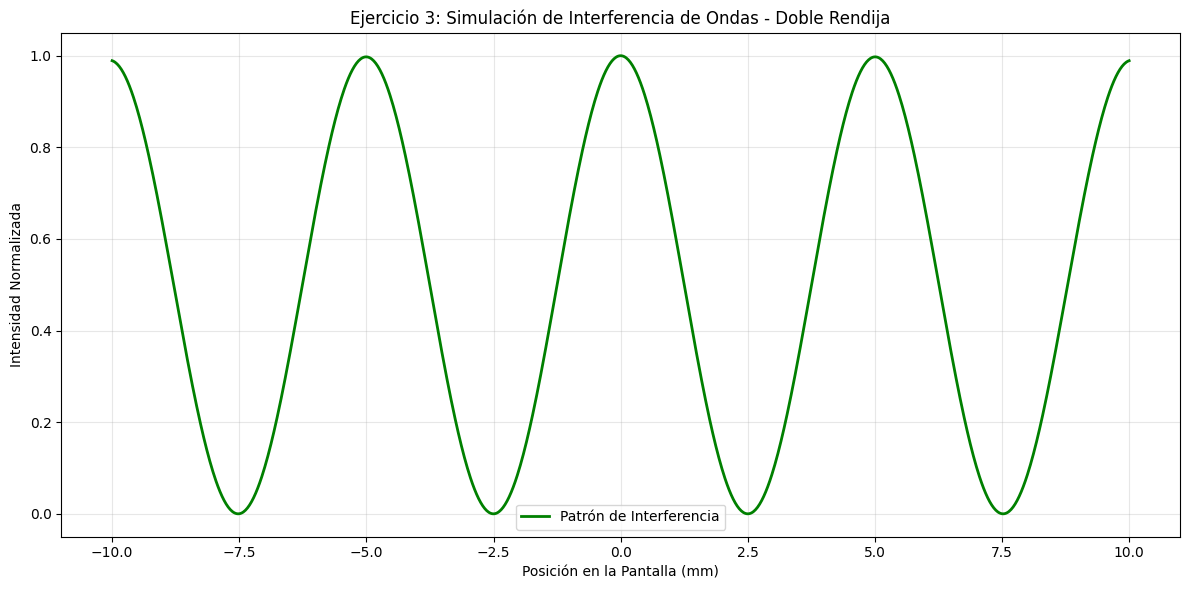

In [5]:
print("\n4. EJERCICIO 3: SIMULACIÓN DE INTERFERENCIA DE ONDAS")
print("-" * 40)

def wave_interference_simulation():
    """
    Simula el experimento de doble rendija modelando la luz como ondas.
    Cada rendija actúa como fuente puntual de ondas circulares.
    """

    # Parámetros físicos
    slit_distance = 10e-6  # 10 micrómetros entre rendijas
    wavelength = 500e-9    # 500 nm (luz verde)
    screen_distance = 0.1  # 10 cm a la pantalla
    screen_width = 0.02    # 2 cm ancho de pantalla
    num_points = 1000      # Puntos en la pantalla

    # Posiciones de las rendijas (en el plano y=0)
    slit1_pos = np.array([0, slit_distance/2])
    slit2_pos = np.array([0, -slit_distance/2])

    # Puntos en la pantalla
    y_screen = np.linspace(-screen_width/2, screen_width/2, num_points)
    screen_positions = np.array([[screen_distance, y] for y in y_screen])

    # Calcular intensidad en cada punto de la pantalla
    intensities = []

    for pos in screen_positions:
        # Distancias desde cada rendija al punto en la pantalla
        r1 = np.linalg.norm(pos - slit1_pos)
        r2 = np.linalg.norm(pos - slit2_pos)

        # Diferencia de camino
        path_difference = r2 - r1

        # Diferencia de fase
        phase_difference = 2 * np.pi * path_difference / wavelength

        # Amplitudes (considerando factor de dispersión 1/r)
        amp1 = 1.0 / r1
        amp2 = 1.0 / r2

        # Suma coherente de amplitudes (ondas en fase en el origen)
        total_amplitude_real = amp1 + amp2 * np.cos(phase_difference)
        total_amplitude_imag = amp2 * np.sin(phase_difference)

        # Intensidad = |E|²
        intensity = total_amplitude_real**2 + total_amplitude_imag**2
        intensities.append(intensity)

    intensities = np.array(intensities)

    # Normalizar intensidades
    intensities = intensities / np.max(intensities)

    return y_screen * 1000, intensities  # Convertir a mm para el gráfico

# Ejecutar simulación de ondas
screen_positions_mm, wave_intensities = wave_interference_simulation()

print("Simulación de interferencia de ondas completada.")
print(f"Número de franjas principales observadas: {len([1 for i in range(1, len(wave_intensities)-1) if wave_intensities[i] > wave_intensities[i-1] and wave_intensities[i] > wave_intensities[i+1] and wave_intensities[i] > 0.5])}")

# Gráfico de interferencia de ondas
plt.figure(figsize=(12, 6))
plt.plot(screen_positions_mm, wave_intensities, 'g-', linewidth=2, label='Patrón de Interferencia')
plt.xlabel('Posición en la Pantalla (mm)')
plt.ylabel('Intensidad Normalizada')
plt.title('Ejercicio 3: Simulación de Interferencia de Ondas - Doble Rendija')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()